# **FRAUDULENT TRANSACTION DETECTION PROJECT USING TRADITIONAL MACHINE LEARNING**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('onlinefraud.csv')

## **EXPLORATORY DATA ANALYSIS (EDA) + DATA PREPROCESSING**

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


| Feature           | Description                                                                 |
|------------------|-----------------------------------------------------------------------------|
| `step`           | Represents a unit of time (1 step = 1 hour).                                 |
| `type`           | Type of online transaction (`PAYMENT`, `TRANSFER`, `CASH_OUT`, etc.).       |
| `amount`         | The amount of the transaction.                                               |
| `nameOrig`       | ID of the customer initiating the transaction.                              |
| `oldbalanceOrg`  | Customer’s account balance before the transaction.                          |
| `newbalanceOrig` | Customer’s account balance after the transaction.                           |
| `nameDest`       | ID of the recipient of the transaction.                                     |
| `oldbalanceDest` | Recipient’s account balance before the transaction.                         |
| `newbalanceDest` | Recipient’s account balance after the transaction.                          |
| `isFraud`        | Indicates if the transaction is fraudulent (`1`) or not (`0`).              |
| `isFlaggedFraud` | Indicates if the transaction was flagged as fraud by the system (`1`/`0`).  |


### **SUMMARY STATISTICS OF THE DATASET**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.describe(exclude='number')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1677795071,C1286084959
freq,2237500,3,113


In [8]:
type_unique = df['type'].unique()

print(type_unique)

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


#### Exploratory Summary of Transaction Types

Using the `df.describe()` method on the categorical `type` column, we identified **five unique types of transactions** in the dataset:

- `PAYMENT`
- `TRANSFER`
- `CASH_OUT`
- `DEBIT`
- `CASH_IN`

These transaction types represent different forms of financial activity and will be crucial for understanding user behavior and detecting potential fraud patterns.


### **DATA CLEANING**

#### Check for null values

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### Check for duplicate rows

In [10]:
duplicate_count = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


#### Check for outliers

In [11]:
numerical_features = df.select_dtypes(include=[np.number])

print(numerical_features.columns)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


In [12]:
numerical_features = numerical_features.drop(columns=['step', 'isFlaggedFraud', 'isFraud'])

print(numerical_features.columns)

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')


#### Dropping Irrelevant or Target Columns

- The `step` column was dropped because it represents the hour of the transaction and does not contribute meaningful information for fraud detection on its own.

- The `isFlaggedFraud` and `isFraud` columns were also dropped **during preprocessing for feature engineering purposes**. This is because `isFraud` is the **target variable** we aim to predict, and should not be used as an input feature. Similarly, `isFlaggedFraud` is a system-generated flag and may leak label information or introduce bias if used during training.


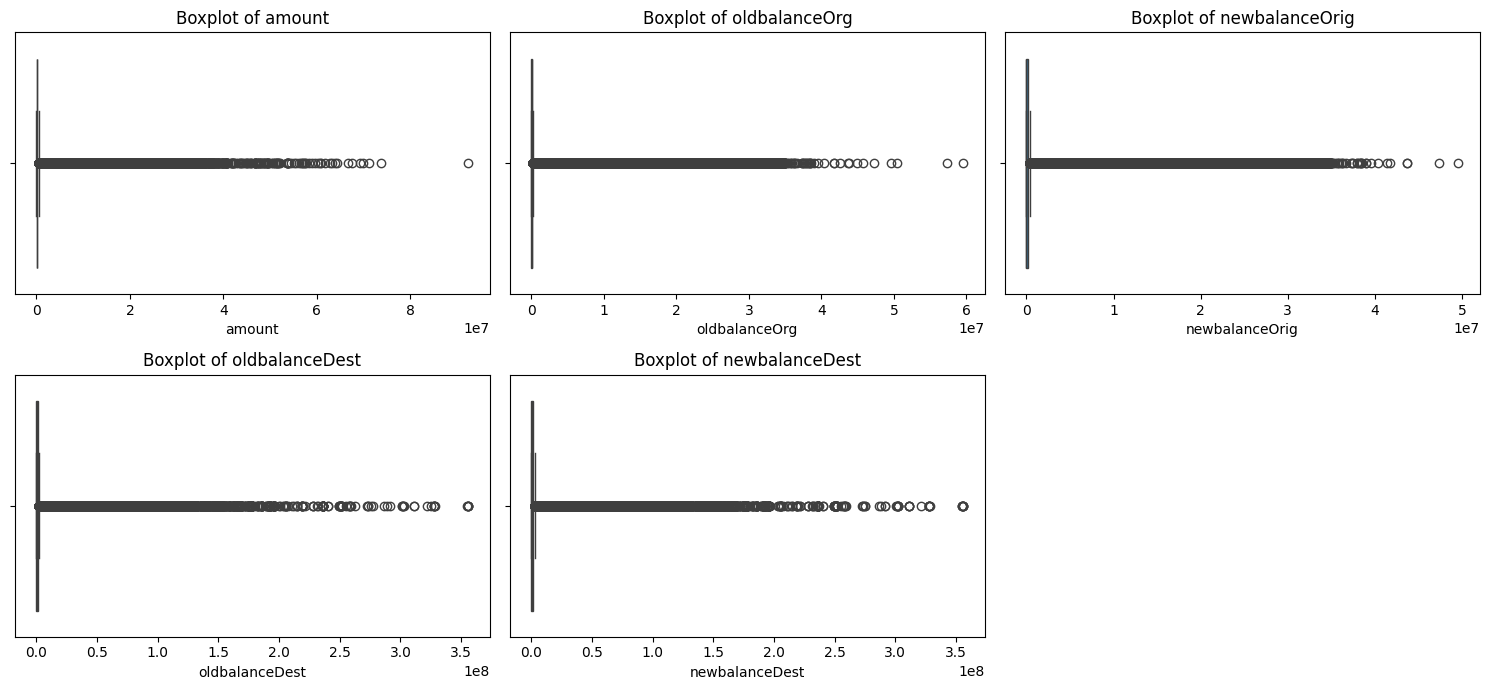

In [13]:
plt.figure(figsize=(15, 7))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

#### Outlier Analysis

Based on the boxplots created for the numerical features, we observed a significant number of outliers and extreme outliers across multiple columns.

However, these outliers were **not removed**, as they may represent important indicators of fraudulent transactions. Fraud often involves unusually large or irregular transaction amounts, and removing these data points could result in the loss of valuable fraud-related patterns. Therefore, retaining outliers helps preserve the integrity of the dataset for accurate fraud detection.


array([[<Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'oldbalanceOrg'}>],
       [<Axes: title={'center': 'newbalanceOrig'}>,
        <Axes: title={'center': 'oldbalanceDest'}>],
       [<Axes: title={'center': 'newbalanceDest'}>, <Axes: >]],
      dtype=object)

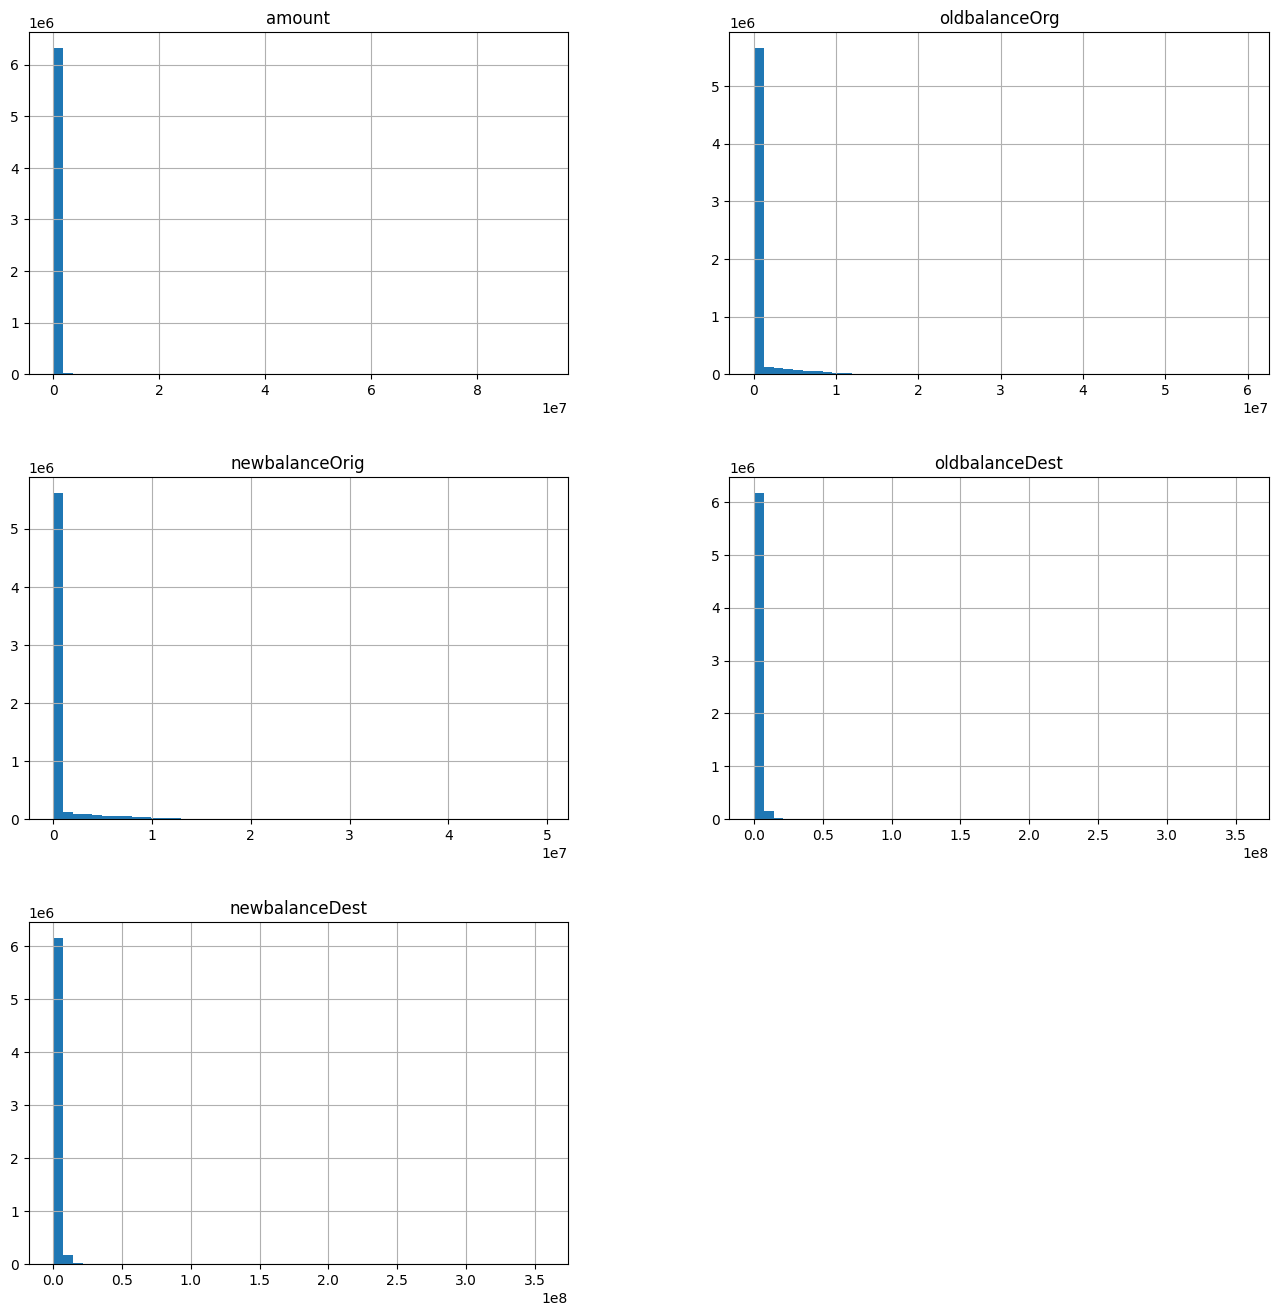

In [14]:
df[numerical_features.columns].hist(bins=50, figsize=(16,16))

In [15]:
df_log = pd.DataFrame()

In [16]:
for i in enumerate(numerical_features):
    df_log[f'{i[1]}_log'] = np.log1p(df[i[1]])

In [17]:
df_log.head()

,amount_log,oldbalanceOrg_log,newbalanceOrig_log,oldbalanceDest_log,newbalanceDest_log
0,9.194276,12.044359,11.984786,0.000000,0.0
1,7.531166,9.964112,9.872292,0.000000,0.0
2,5.204007,5.204007,0.000000,0.000000,0.0
3,5.204007,5.204007,0.000000,9.960954,0.0
4,9.364703,10.634773,10.305174,0.000000,0.0


#### Log Transformation

Log transformation was applied to certain numerical features for the following reasons:

1. **To normalize the data** – Many features in the dataset are highly positively skewed. Applying a log transformation helps reduce skewness and brings the distribution closer to normal.

2. **To improve data visualization** – A more normalized distribution makes it easier to visualize and interpret feature distributions, especially when comparing across fraudulent and non-fraudulent transactions.

This step enhances both exploratory data analysis and model performance, particularly for algorithms sensitive to feature distribution.


array([[<Axes: title={'center': 'amount_log'}>,
        <Axes: title={'center': 'oldbalanceOrg_log'}>],
       [<Axes: title={'center': 'newbalanceOrig_log'}>,
        <Axes: title={'center': 'oldbalanceDest_log'}>],
       [<Axes: title={'center': 'newbalanceDest_log'}>, <Axes: >]],
      dtype=object)

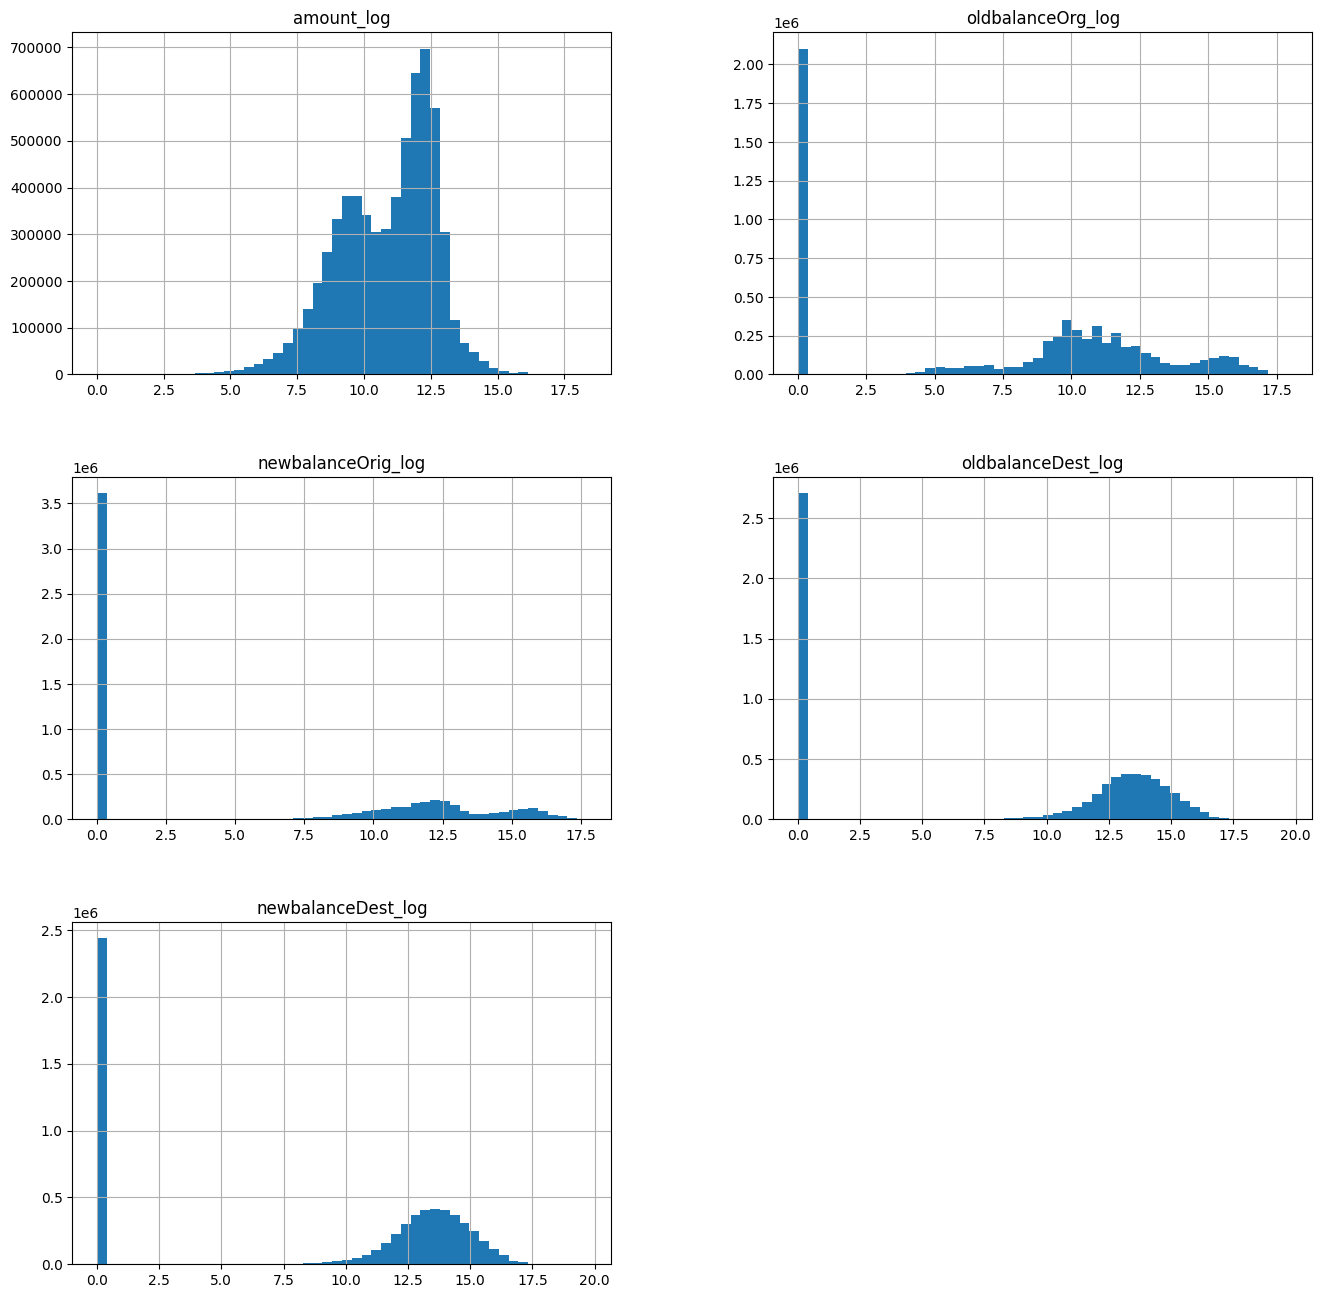

In [18]:
df_log.hist(bins=50, figsize=(16,16))

#### Visualization After Normalization

After applying normalization, the skewness of each feature becomes much clearer. This improved visualization helps us better understand the distribution of the data, making it easier to identify patterns and differences between fraudulent and non-fraudulent transactions.


#### Combining df_log with the original DataFrame

In [19]:
df = pd.concat([df, df_log], axis=1)

In [20]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_log,oldbalanceOrg_log,newbalanceOrig_log,oldbalanceDest_log,newbalanceDest_log
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9.194276,12.044359,11.984786,0.000000,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,7.531166,9.964112,9.872292,0.000000,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,5.204007,5.204007,0.000000,0.000000,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,5.204007,5.204007,0.000000,9.960954,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,9.364703,10.634773,10.305174,0.000000,0.0


#### Combining Log-Transformed Features with the Original Data

We combine the log-transformed features (`df_log`) with the original dataframe to provide the model with information at multiple scales. This enriches the feature set by adding new perspectives on the data distribution, helping the model learn patterns that may be more apparent in either the original or transformed scale.


### **FEATURE ENGINEERING**

#### Purpose of Feature Engineering

The main goals of feature engineering in this step are:

- To **drop irrelevant columns** - features that do not contribute meaningful information to the model’s predictions are removed to reduce noise and improve model performance.

- To **convert categorical columns into numerical formats** - since machine learning models require numerical inputs, categorical features are encoded appropriately before training.


In this step, we will drop the following columns:

- `step` — does not provide meaningful information for fraud detection.
- `isFlaggedFraud` — a flag that may leak information about fraud and is not used as an input feature.

In [21]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_log,oldbalanceOrg_log,newbalanceOrig_log,oldbalanceDest_log,newbalanceDest_log
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9.194276,12.044359,11.984786,0.000000,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,7.531166,9.964112,9.872292,0.000000,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,5.204007,5.204007,0.000000,0.000000,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,5.204007,5.204007,0.000000,9.960954,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,9.364703,10.634773,10.305174,0.000000,0.0


#### Dropping the columns that will not be used

In [22]:
df = df.drop(columns=['step', 'isFlaggedFraud', 'nameDest', 'nameOrig'])

In [23]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,amount_log,oldbalanceOrg_log,newbalanceOrig_log,oldbalanceDest_log,newbalanceDest_log
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9.194276,12.044359,11.984786,0.000000,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,7.531166,9.964112,9.872292,0.000000,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,5.204007,5.204007,0.000000,0.000000,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,5.204007,5.204007,0.000000,9.960954,0.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,9.364703,10.634773,10.305174,0.000000,0.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   type                object 
 1   amount              float64
 2   oldbalanceOrg       float64
 3   newbalanceOrig      float64
 4   oldbalanceDest      float64
 5   newbalanceDest      float64
 6   isFraud             int64  
 7   amount_log          float64
 8   oldbalanceOrg_log   float64
 9   newbalanceOrig_log  float64
 10  oldbalanceDest_log  float64
 11  newbalanceDest_log  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 582.5+ MB


#### Changing the data type for categorical columns (One Hot Encoding)

In [25]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder(sparse_output=False)

# 1. Encoding the 'type' column
encoded_type = OHE.fit_transform(df[['type']])

# 2. Creating a DataFrame with the encoded columns
encoded_type_df = pd.DataFrame(encoded_type, columns=OHE.get_feature_names_out(['type']))

# 3. Concatenating the encoded DataFrame with the original DataFrame
df = pd.concat([df, encoded_type_df], axis=1)

# 4. Dropping the original 'type' column
df = df.drop(columns=['type'])

#### Why Use One-Hot Encoding (OHE) Instead of Label Encoding?

- **One-Hot Encoding (OHE)** converts categorical values into binary vectors without imposing any ordinal relationship between categories. This is important because the transaction types have **no natural order**, and treating them as ordinal values can mislead the model.

- In contrast, **Label Encoding** converts categories into integer values, which introduces an implicit ordinal relationship that is **not appropriate** for nominal categorical variables like transaction types.

- OHE returns a **2D array**, so we convert it into a DataFrame (`encoded_type_df`) and then concatenate it with the original DataFrame (`df`).

- Label Encoder returns a **1D array**, which can be directly assigned as a new column in the DataFrame.

Using OHE helps ensure the model treats each category fairly and independently.


In [26]:
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,amount_log,oldbalanceOrg_log,newbalanceOrig_log,oldbalanceDest_log,newbalanceDest_log,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,9.194276,12.044359,11.984786,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
1,1864.28,21249.0,19384.72,0.0,0.0,0,7.531166,9.964112,9.872292,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
2,181.00,181.0,0.00,0.0,0.0,1,5.204007,5.204007,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
3,181.00,181.0,0.00,21182.0,0.0,1,5.204007,5.204007,0.000000,9.960954,0.0,0.0,1.0,0.0,0.0,0.0
4,11668.14,41554.0,29885.86,0.0,0.0,0,9.364703,10.634773,10.305174,0.000000,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   amount              float64
 1   oldbalanceOrg       float64
 2   newbalanceOrig      float64
 3   oldbalanceDest      float64
 4   newbalanceDest      float64
 5   isFraud             int64  
 6   amount_log          float64
 7   oldbalanceOrg_log   float64
 8   newbalanceOrig_log  float64
 9   oldbalanceDest_log  float64
 10  newbalanceDest_log  float64
 11  type_CASH_IN        float64
 12  type_CASH_OUT       float64
 13  type_DEBIT          float64
 14  type_PAYMENT        float64
 15  type_TRANSFER       float64
dtypes: float64(15), int64(1)
memory usage: 776.7 MB


tbc